(991346, 24)


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

-1.2726375396245835
0.4141733052412185


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


MAE:1 1.1094765424193946
MSE:1 1.8638480376557032
RMSE:1 1.3652281998463491
MAE:2 0.4814403810202582
MSE:2 0.23847155682695156
RMSE:2 0.4883354961775271


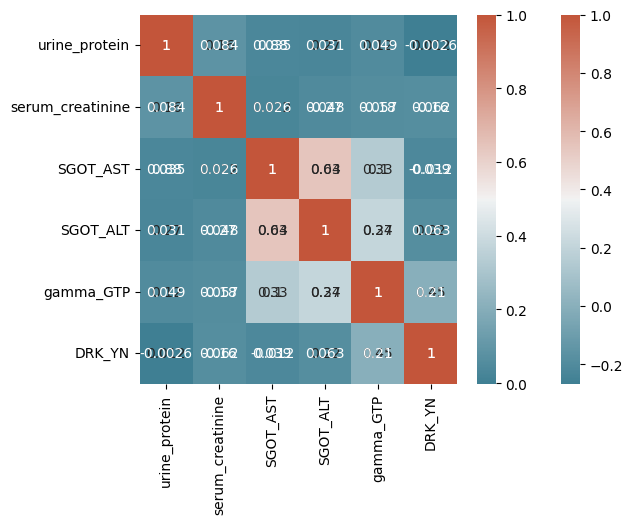

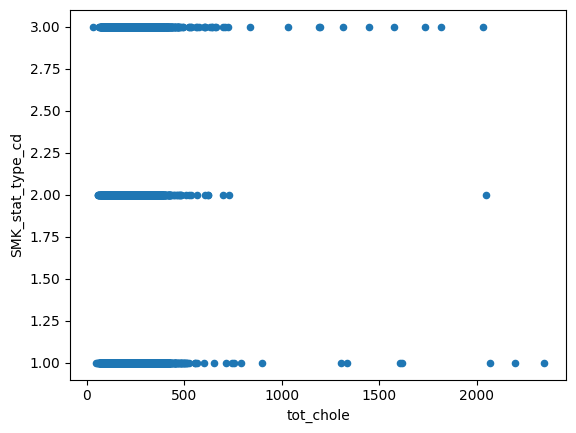

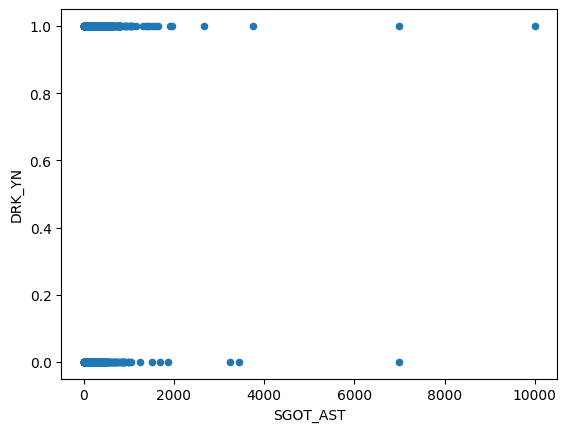

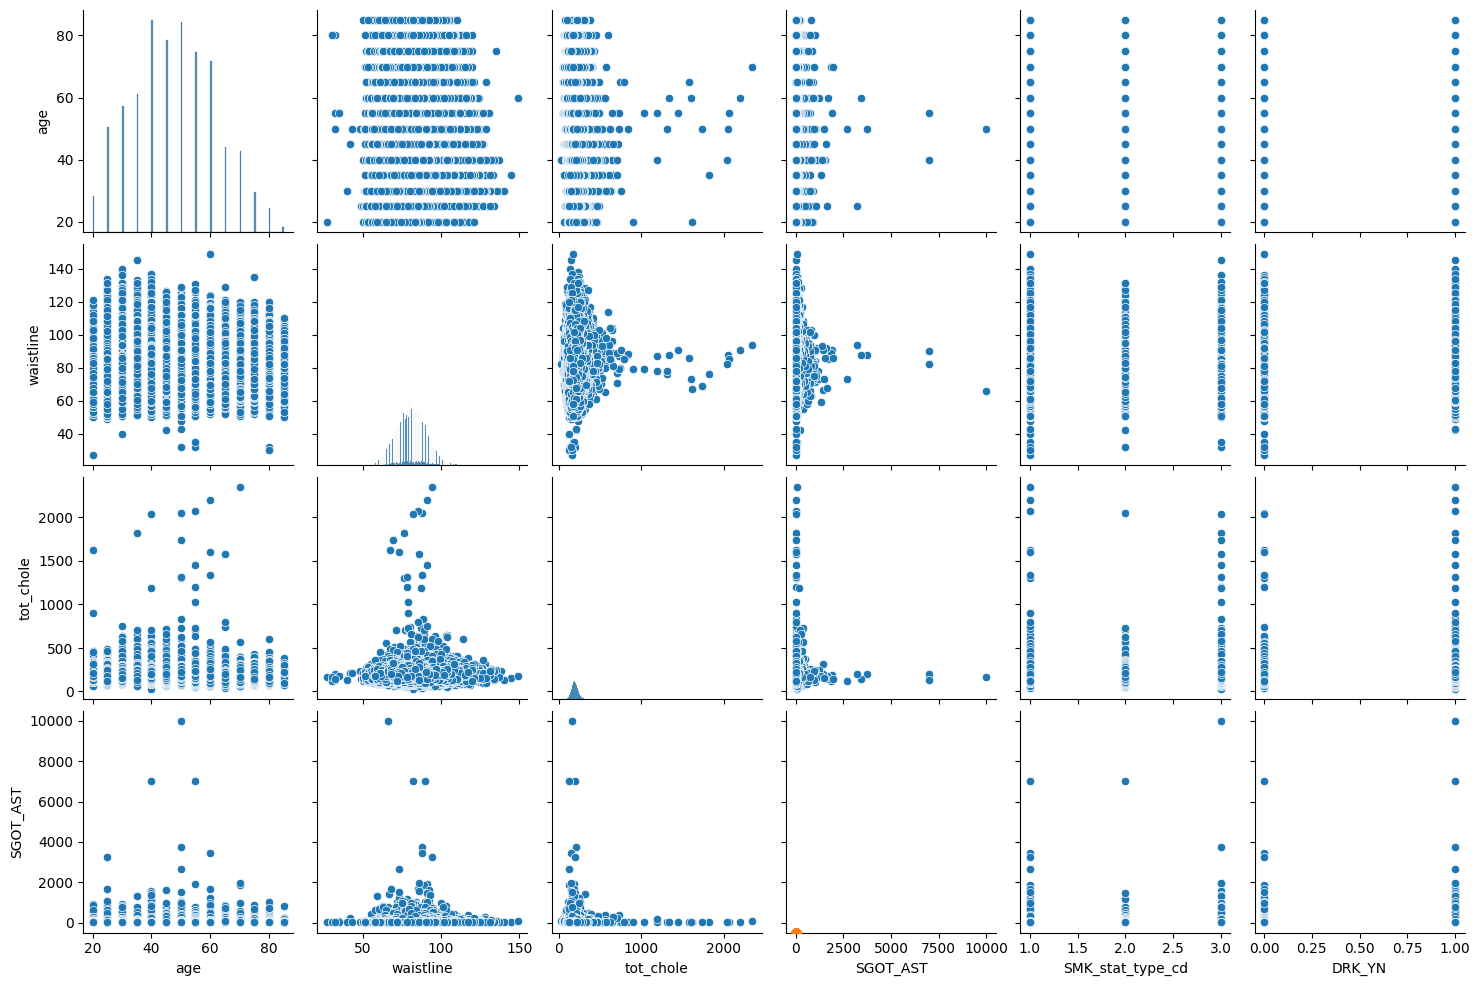

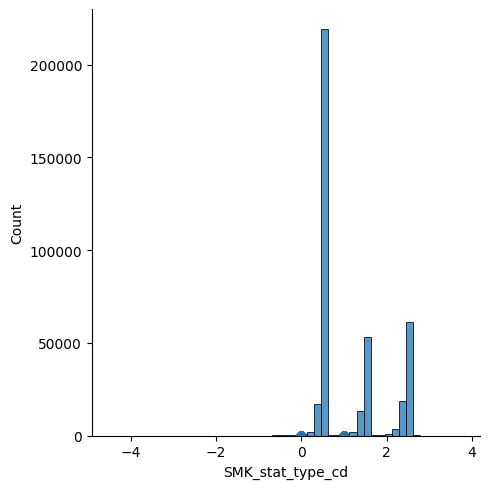

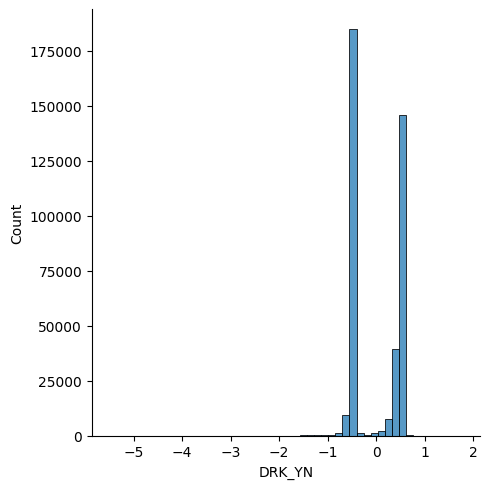

In [17]:
import numpy as np
import pandas as pd  
import matplotlib.pylab as plt 
from matplotlib import pyplot as plt1
import seaborn as sns 
from sklearn.model_selection import train_test_split 
# read the datafile using panda library.  ensure right file location on machine. 
data = pd.read_csv(r"C:\Users\SAARTH CHAHAL\Desktop\Programming\AIML\smoking_driking_dataset_Ver01.csv")
# EDA (Exploratory Data Analysis): 
# Determine number of rows and colums in the provided data
data.shape 
# print(data.shape)
data.head()
data.columns
data.nunique(axis=0)

# Describe to Understanding the dataset. 
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

# Cleaning dataset by removing null values using method.  on visual examination of data there was no null value
data_cleaned = data.dropna(axis=0)
print(data_cleaned.shape) 

# Cleaning  dataset by removing outliers 
# waistline range of 25 to 150 is based on observation of the data 
data_cleaned = data_cleaned[data_cleaned['waistline'].between(25,150)]   
# sight_left above 5 is based on observation of the data  
data_cleaned = data_cleaned[data_cleaned['sight_left'] < 5 ]
# sight_right above 5 is based on observation of the data  
data_cleaned = data_cleaned[data_cleaned['sight_right'] < 5 ]
#since in correlation down the line we will require all number we will need to drop sex which takes string as input.  
data_cleaned = data_cleaned.drop('sex',axis=1) 
# convert drinker as Y or N 
data_cleaned['DRK_YN'] = np.where(data_cleaned['DRK_YN'] == 'Y', 1,0 ) 


data_cleaned.shape

data_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

# Able to reduce 5803 records which are outliers in the data. 
# not changing any data related to BP as data seems to be in range. 

# Data Plotting exercise
# to analyze relation ship between variables. 
# calculate the correlation matrix.   
# There are too many variables to produce more readable correlation matrix and heatmap
# Created 2 smaller array for matrix and heatmap for smoke and drink correlation 

dfdata= pd.DataFrame(data_cleaned) 
dfdata_smk=dfdata[['tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','SMK_stat_type_cd']]
dfdata_drk=dfdata[['urine_protein','serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP','DRK_YN']]
corr_matrix_smk = dfdata_smk.corr()
corr_matrix_drk = dfdata_drk.corr()

# plot the heatmap 
sns.heatmap(corr_matrix_smk, xticklabels=corr_matrix_smk.columns, yticklabels=corr_matrix_smk.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr_matrix_drk, xticklabels=corr_matrix_drk.columns, yticklabels=corr_matrix_drk.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# scatter plots for two variables 
dfdata.plot(kind='scatter', x='tot_chole', y='SMK_stat_type_cd')
dfdata.plot(kind='scatter', x='SGOT_AST', y='DRK_YN') 

# sns.pairplot for few variables 
sns.pairplot ( dfdata ,
x_vars=["age" ,"waistline", "tot_chole" ,  "SGOT_AST"  , "SMK_stat_type_cd"   , "DRK_YN" ], 
y_vars=["age" ,"waistline", "tot_chole" ,  "SGOT_AST"] , ) 

# Model training Module 
# Learning model 

from sklearn.model_selection import train_test_split 
# Train learning regression model  
# We will need to first split up our data into an X1 array(cholesterol)  that contains the features to train on, 
# And a y1 array(SMK_stat_type_cd) with the target variable, 
X1=dfdata[['tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin']]
y1=dfdata['SMK_stat_type_cd']
# split up our data into an X2 array(Kidney function) that contains the features to train on, 
# And a y2 array(DRK_YN)
X2=dfdata[['urine_protein','serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP']]
y2=dfdata['DRK_YN']

# Train test split. test split is 40 % train set is 60 % 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=42)

# #Loading the linear regression Model

from sklearn.linear_model import LinearRegression 

lm1 = LinearRegression() 
lm2= LinearRegression() 
lm1.fit(X1_train,y1_train)  
lm2.fit(X2_train,y2_train) 
# prediction on Training data  
# prediction on Training data 
training_data_prediction1 = lm1.predict(X1_train) 
training_data_prediction2 = lm2.predict(X2_train) 

# Model evlauation.  
# Let's evaluate the model by checking out it's coefficients and how we can interpret them.
print(lm1.intercept_)
coeff_df1 = pd.DataFrame(lm1.coef_,X1.columns,columns=['Coefficient'])
coeff_df1 
print(lm2.intercept_)
coeff_df2 = pd.DataFrame(lm2.coef_,X2.columns,columns=['Coefficient'])
coeff_df2 
## interpreting the coefficient.
# For every one unit change in smoke status there is negative impact on Cholestrol ( refelcted as negative)
# and increase in  triglyceride and  hemoglobin which negatively affect the health indicator. 

# # Prediction from Model. 

predictions = lm1.predict(X1_test)
predictions = lm2.predict(X2_test)
plt1.scatter(y1_test,predictions)
sns.displot((y1_test-predictions),bins=50); 
plt1.scatter(y2_test,predictions)
sns.displot((y2_test-predictions),bins=50);

# Regression Evaluation Metrics
# Here are three common evaluation metrics for regression problems:
# Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: is the easiest to understand, because it's the average error.
# Mean Squared Error** (MSE) is the mean of the squared errors: is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
# Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors: is even more popular than MSE, because RMSE is interpretable in the "y" units.

from sklearn import metrics
print('MAE:1',metrics.mean_absolute_error(y1_test, predictions))
print('MSE:1',metrics.mean_squared_error(y1_test, predictions))
print('RMSE:1',np.sqrt(metrics.mean_squared_error(y1_test, predictions)))

print('MAE:2',metrics.mean_absolute_error(y2_test, predictions))
print('MSE:2',metrics.mean_squared_error(y2_test, predictions))
print('RMSE:2',np.sqrt(metrics.mean_squared_error(y2_test, predictions)))



